# Online Retail Shipping Analysis

## Importing Necessary Module

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Dictionary

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:


- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Business Background
### NanoTech Global E-commerce Leader in Electronics

NanoTech is a leading online retailer specializing in a wide range of electronic products. Operating in a highly competitive global market with tight margins, NanoTech seeks to optimize its fulfillment processes and improve on-time delivery rates to maintain a competitive edge. Additionally, gaining a deeper understanding of the customer base is crucial for enhancing shipping timeliness and overall customer satisfaction.

## Business Problem
NanoTech is a global e-commerce retail business specializing in a wide variety of electronic products. NanoTech has identified an issue with its on-time delivery rate and aims to investigate the root causes of this problem. The company seeks to determine what improvements are needed and to assess the impact of delivery performance on overall customer satisfaction.

## Importing the Database, Checking and Cleaning

In [91]:
df = pd.read_csv("./Online Retail Shipping/Online Retail Shipping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [93]:
df.shape

(10999, 12)

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


### Checking Null Values

In [95]:
# Checking for Null values
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Checking Duplicate Values

In [96]:
# Checking for Duplicates 
df.duplicated().sum()

0

In [97]:
df["ID"].duplicated().sum()

0

### Checking for Typos

In [98]:
# Checking for typos
df["Product_importance"].value_counts().reset_index()

,Product_importance,count
0,low,5297
1,medium,4754
2,high,948


In [99]:
# Checking for typos
df["Mode_of_Shipment"].value_counts().reset_index()

,Mode_of_Shipment,count
0,Ship,7462
1,Flight,1777
2,Road,1760


In [100]:
# Checking for typos
df["Gender"].value_counts().reset_index()

,Gender,count
0,F,5545
1,M,5454


In [101]:
df['Gender'].replace({"F":"Female", "M":"Male"}, inplace=True)
df["Gender"].value_counts().reset_index()

,Gender,count
0,Female,5545
1,Male,5454


In [102]:
# Checking for typos
df["Warehouse_block"].value_counts().reset_index()

,Warehouse_block,count
0,F,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


In [103]:
df['Warehouse_block'].replace({"F":"E"}, inplace=True)
df["Warehouse_block"].value_counts().reset_index()

,Warehouse_block,count
0,E,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


Data check result:

1. There is no NA\NULL value in the dataframe
2. There is no duplicated value
3. There is no misspelled value
4. Changing value in Gender column from F to Female, and M to Male for better understanding
5. Changing the name of the warehouse from warehouse F to warehouse E to follow the data dictionary.

### Checking for Outliers

In [104]:
# Creating a New Dataframe to Check for Outliers and Correlation
df_check = df[["Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Discount_offered", "Weight_in_gms", "Reached.on.Time_Y.N"]]
df_check

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1
10995,4,1,232,5,6,1247,0
10996,5,4,242,5,4,1155,0
10997,5,2,223,6,2,1210,0


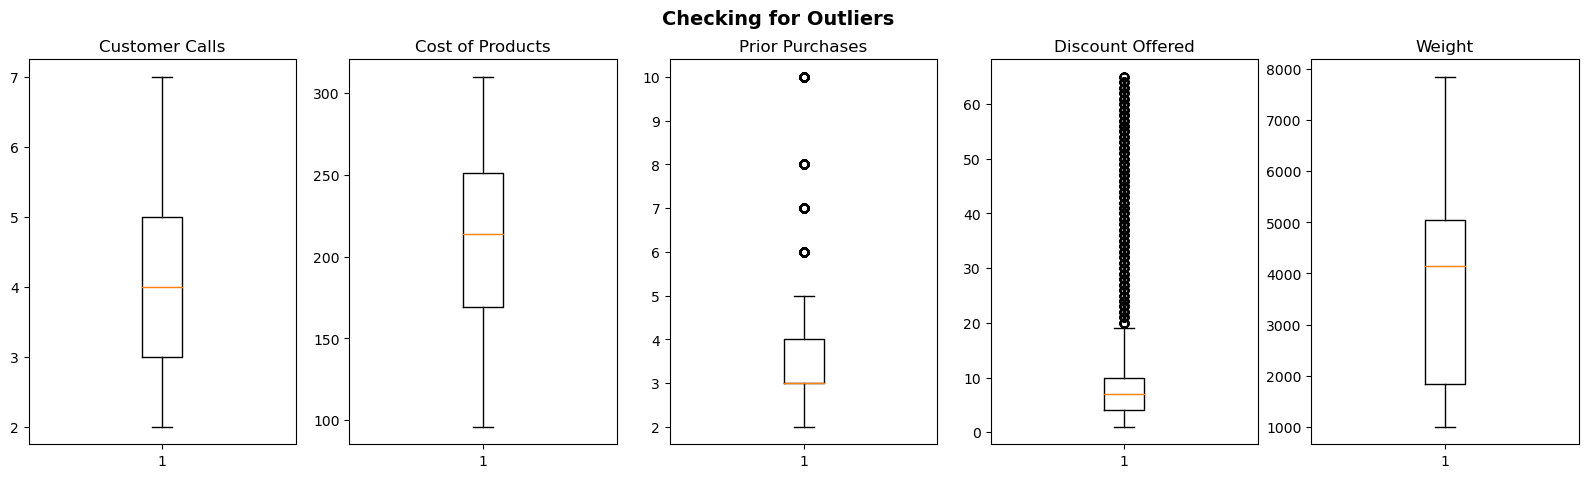

In [105]:
# Checking for outliers
figure, axes = plt.subplots(1, 5, figsize=(20, 5))
figure.suptitle("Checking for Outliers", size=14, fontweight="bold")

axes[0].boxplot(df_check["Customer_care_calls"])
axes[0].set_title("Customer Calls")

axes[1].boxplot(df_check["Cost_of_the_Product"])
axes[1].set_title("Cost of Products")

axes[2].boxplot(df_check["Prior_purchases"])
axes[2].set_title("Prior Purchases")

axes[3].boxplot(df_check["Discount_offered"])
axes[3].set_title("Discount Offered")

axes[4].boxplot(df_check["Weight_in_gms"])
axes[4].set_title("Weight")

plt.show()


In [106]:
# Customer Calls IQR
cc_q1 = df["Customer_care_calls"].quantile(0.25)
cc_q3 = df["Customer_care_calls"].quantile(0.75)
IQR = cc_q3 - cc_q1

print(f"Q1: {cc_q1}")
print(f"Q3: {cc_q3}")
print(f"IQR: {IQR}")

Q1: 3.0
Q3: 5.0
IQR: 2.0


In [107]:
# Customer Calls Outliers
lower_bound = cc_q1 - 1.5 * IQR
upper_bound = cc_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Customer_care_calls"] < lower_bound) | (df["Customer_care_calls"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Customer_care_calls"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: 0.0
Upper bound for outliers: 8.0
Count of outliers: 0


In [108]:
# Cost of Products IQR
cp_q1 = df["Cost_of_the_Product"].quantile(0.25)
cp_q3 = df["Cost_of_the_Product"].quantile(0.75)
IQR = cp_q3 - cp_q1

print(f"Q1: {cp_q1}")
print(f"Q3: {cp_q3}")
print(f"IQR: {IQR}")

Q1: 169.0
Q3: 251.0
IQR: 82.0


In [109]:
# Cost of Products Outliers
lower_bound = cp_q1 - 1.5 * IQR
upper_bound = cp_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Cost_of_the_Product"] < lower_bound) | (df["Cost_of_the_Product"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Cost_of_the_Product"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: 46.0
Upper bound for outliers: 374.0
Count of outliers: 0


In [110]:
# Prior Purchases IQR
pp_q1 = df["Prior_purchases"].quantile(0.25)
pp_q3 = df["Prior_purchases"].quantile(0.75)
IQR = pp_q3 - pp_q1

print(f"Q1: {pp_q1}")
print(f"Q3: {pp_q3}")
print(f"IQR: {IQR}")

Q1: 3.0
Q3: 4.0
IQR: 1.0


In [111]:
# Prior Purchases Outliers
lower_bound = pp_q1 - 1.5 * IQR
upper_bound = pp_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Prior_purchases"] < lower_bound) | (df["Prior_purchases"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Prior_purchases"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: 1.5
Upper bound for outliers: 5.5
Count of outliers: 1003


In [112]:
# Discount Offered IQR
do_q1 = df["Discount_offered"].quantile(0.25)
do_q3 = df["Discount_offered"].quantile(0.75)
IQR = do_q3 - do_q1

print(f"Q1: {do_q1}")
print(f"Q3: {do_q3}")
print(f"IQR: {IQR}")

Q1: 4.0
Q3: 10.0
IQR: 6.0


In [113]:
# Discount Offered Outliers
lower_bound = do_q1 - 1.5 * IQR
upper_bound = do_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Discount_offered"] < lower_bound) | (df["Discount_offered"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Discount_offered"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: -5.0
Upper bound for outliers: 19.0
Count of outliers: 2209


In [114]:
# Weight Offered IQR
w_q1 = df["Weight_in_gms"].quantile(0.25)
w_q3 = df["Weight_in_gms"].quantile(0.75)
IQR = w_q3 - w_q1

print(f"Q1: {w_q1}")
print(f"Q3: {w_q3}")
print(f"IQR: {IQR}")

Q1: 1839.5
Q3: 5050.0
IQR: 3210.5


In [115]:
# Product Weight Outliers
lower_bound = w_q1 - 1.5 * IQR
upper_bound = w_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Weight_in_gms"] < lower_bound) | (df["Weight_in_gms"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Weight_in_gms"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: -2976.25
Upper bound for outliers: 9865.75
Count of outliers: 0


Insight after checking the outliers:

1. There is no outliers in Customer Care Calls, Cost of Product, and Weight of the Product
2. Found 1003 outliers beyond the upper bound of Prior Purchases
3. Found 2209 outliers beyond the upper bound of Discount Offered

Decision:

1. No Outliers in Customer Care Calls, Cost of Product, and Weight of the Product: This implies these aspects are consistent across the dataset, but the absence of outliers here highlights the importance of analyzing outliers in other areas.
2. 1003 Outliers in Prior Purchases: These outliers could represent highly active customers or bulk buyers. Understanding their behavior is crucial for loyalty programs, inventory management, and personalized marketing strategies.
3. 2209 Outliers in Discount Offered: These could indicate special promotions or errors in discount application. Analyzing these outliers can help in refining discount strategies, ensuring promotional effectiveness, and avoiding potential revenue loss due to excessive discounting.

## Data Manipulating

In [116]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,Female,44,1233,1
1,2,E,Flight,4,5,216,2,low,Male,59,3088,1
2,3,A,Flight,2,2,183,4,low,Male,48,3374,1
3,4,B,Flight,3,3,176,4,medium,Male,10,1177,1
4,5,C,Flight,2,2,184,3,medium,Female,46,2484,1


In [117]:
df["Late_or_ontime"] = df["Reached.on.Time_Y.N"].map({1:"Late", 0:"Ontime"})
df[["Reached.on.Time_Y.N","Late_or_ontime"]].reset_index()

,index,Reached.on.Time_Y.N,Late_or_ontime
0,0,1,Late
1,1,1,Late
2,2,1,Late
3,3,1,Late
4,4,1,Late
...,...,...,...
10994,10994,1,Late
10995,10995,0,Ontime
10996,10996,0,Ontime
10997,10997,0,Ontime


In [118]:
df["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Late_or_ontime,proportion
0,Late,0.596691
1,Ontime,0.403309


In [119]:
df["Customer_satisfaction"] = df["Customer_rating"].apply(lambda x: "Dissatisfied" if x in [1, 2] else ("Neutral" if x == 3 else "Satisfied"))
df[["Customer_rating", "Customer_satisfaction"]].reset_index()


,index,Customer_rating,Customer_satisfaction
0,0,2,Dissatisfied
1,1,5,Satisfied
2,2,2,Dissatisfied
3,3,3,Neutral
4,4,2,Dissatisfied
...,...,...,...
10994,10994,1,Dissatisfied
10995,10995,1,Dissatisfied
10996,10996,4,Satisfied
10997,10997,2,Dissatisfied


In [120]:
df["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Customer_satisfaction,proportion
0,Dissatisfied,0.400036
1,Satisfied,0.396400
2,Neutral,0.203564


In [121]:
df["Prior_purchases"].describe()

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64

In [122]:
df["Customer_segmentation"] = df["Prior_purchases"].apply(lambda x: "Occasional" if x in [1, 2, 3] else ("Regular" if x in [4, 5, 6] else "Loyal"))
df[["Prior_purchases","Customer_segmentation"]].reset_index()

,index,Prior_purchases,Customer_segmentation
0,0,3,Occasional
1,1,2,Occasional
2,2,4,Regular
3,3,4,Regular
4,4,3,Occasional
...,...,...,...
10994,10994,5,Regular
10995,10995,5,Regular
10996,10996,5,Regular
10997,10997,6,Regular


In [123]:
df["Customer_segmentation"].value_counts(normalize=True).reset_index()

,Customer_segmentation,proportion
0,Occasional,0.595872
1,Regular,0.363942
2,Loyal,0.040185


In [124]:
df["Weight_category"] = df["Weight_in_gms"].apply(lambda x: "Light weight" if 1000 <= x <= 3000 else ("Medium weight" if 3001 <= x <= 5000 else "Heavy weight"))
df[["Weight_in_gms","Weight_category"]].reset_index()

,index,Weight_in_gms,Weight_category
0,0,1233,Light weight
1,1,3088,Medium weight
2,2,3374,Medium weight
3,3,1177,Light weight
4,4,2484,Light weight
...,...,...,...
10994,10994,1538,Light weight
10995,10995,1247,Light weight
10996,10996,1155,Light weight
10997,10997,1210,Light weight


Data manipulation result:
1. Creating a new column Late_or_ontime to map the shipping arrival time. 0 for On-time and 1 for Late.
2. Creating a new column Customer_satisfaction to track satisfaction rate of NanoTech customers based on Customer_rating column. 1-2 is Dissatisfied, 3 is Neutral, 4-5 is Satisfied.
3. Creating a new column Customer_segmentation to segment customers based on their prior purchases. 1-3 is Occasional, 4-6 is Regular, and 7 beyond is Lolay customers.
4. Creating a new column Weight_category to track product distribution based on the Weight_in_gms. 1000-3000 gram is Light weight, 3001 to 5000 is Medium weight, and 5001 beyond is Heavy weight.

## Data Analysis

### Looking at each individual column

In [125]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Late_or_ontime,Customer_satisfaction,Customer_segmentation,Weight_category
0,1,D,Flight,4,2,177,3,low,Female,44,1233,1,Late,Dissatisfied,Occasional,Light weight
1,2,E,Flight,4,5,216,2,low,Male,59,3088,1,Late,Satisfied,Occasional,Medium weight
2,3,A,Flight,2,2,183,4,low,Male,48,3374,1,Late,Dissatisfied,Regular,Medium weight
3,4,B,Flight,3,3,176,4,medium,Male,10,1177,1,Late,Neutral,Regular,Light weight
4,5,C,Flight,2,2,184,3,medium,Female,46,2484,1,Late,Dissatisfied,Occasional,Light weight
5,6,E,Flight,3,1,162,3,medium,Female,12,1417,1,Late,Dissatisfied,Occasional,Light weight
6,7,D,Flight,3,4,250,3,low,Female,3,2371,1,Late,Satisfied,Occasional,Light weight
7,8,E,Flight,4,1,233,2,low,Female,48,2804,1,Late,Dissatisfied,Occasional,Light weight
8,9,A,Flight,3,4,150,3,low,Female,11,1861,1,Late,Satisfied,Occasional,Light weight
9,10,B,Flight,3,2,164,3,medium,Female,29,1187,1,Late,Dissatisfied,Occasional,Light weight


#### Correlation Between Variable

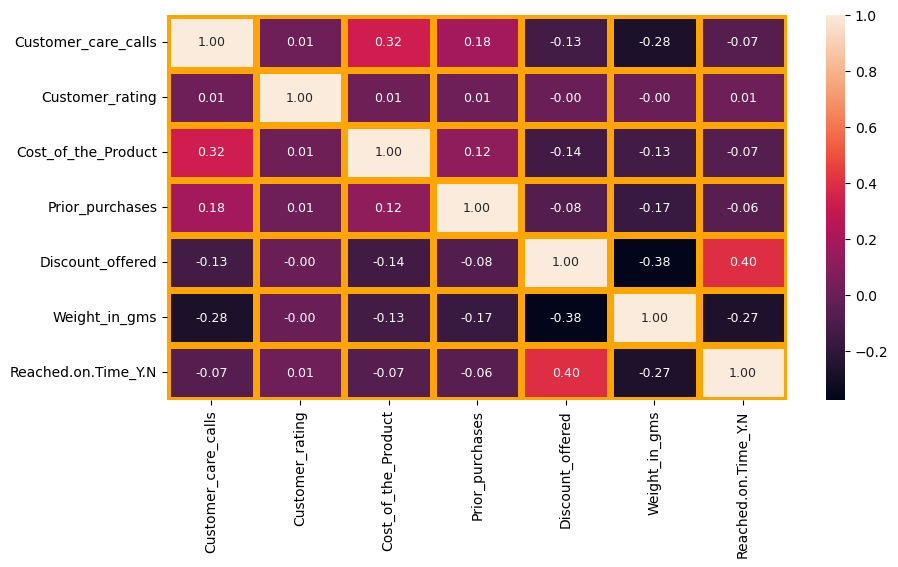

In [126]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_check.corr(numeric_only=True), annot = True, fmt = '0.2f', annot_kws = {'size' : 9}, linewidth = 5, linecolor = 'orange')
plt.show()

Insights:
1. Highest correlation between variable is Reached.on.Time_Y.N with Discount_offered with 0.40. But it's still a weak relationship.
2. Followed by a negative correlation between variable Weight_in_gms with Discount_offered with -0.38. But it's still a weak relationship.
3. All variable have a weak correlation between each other.

#### Distribution of Columns

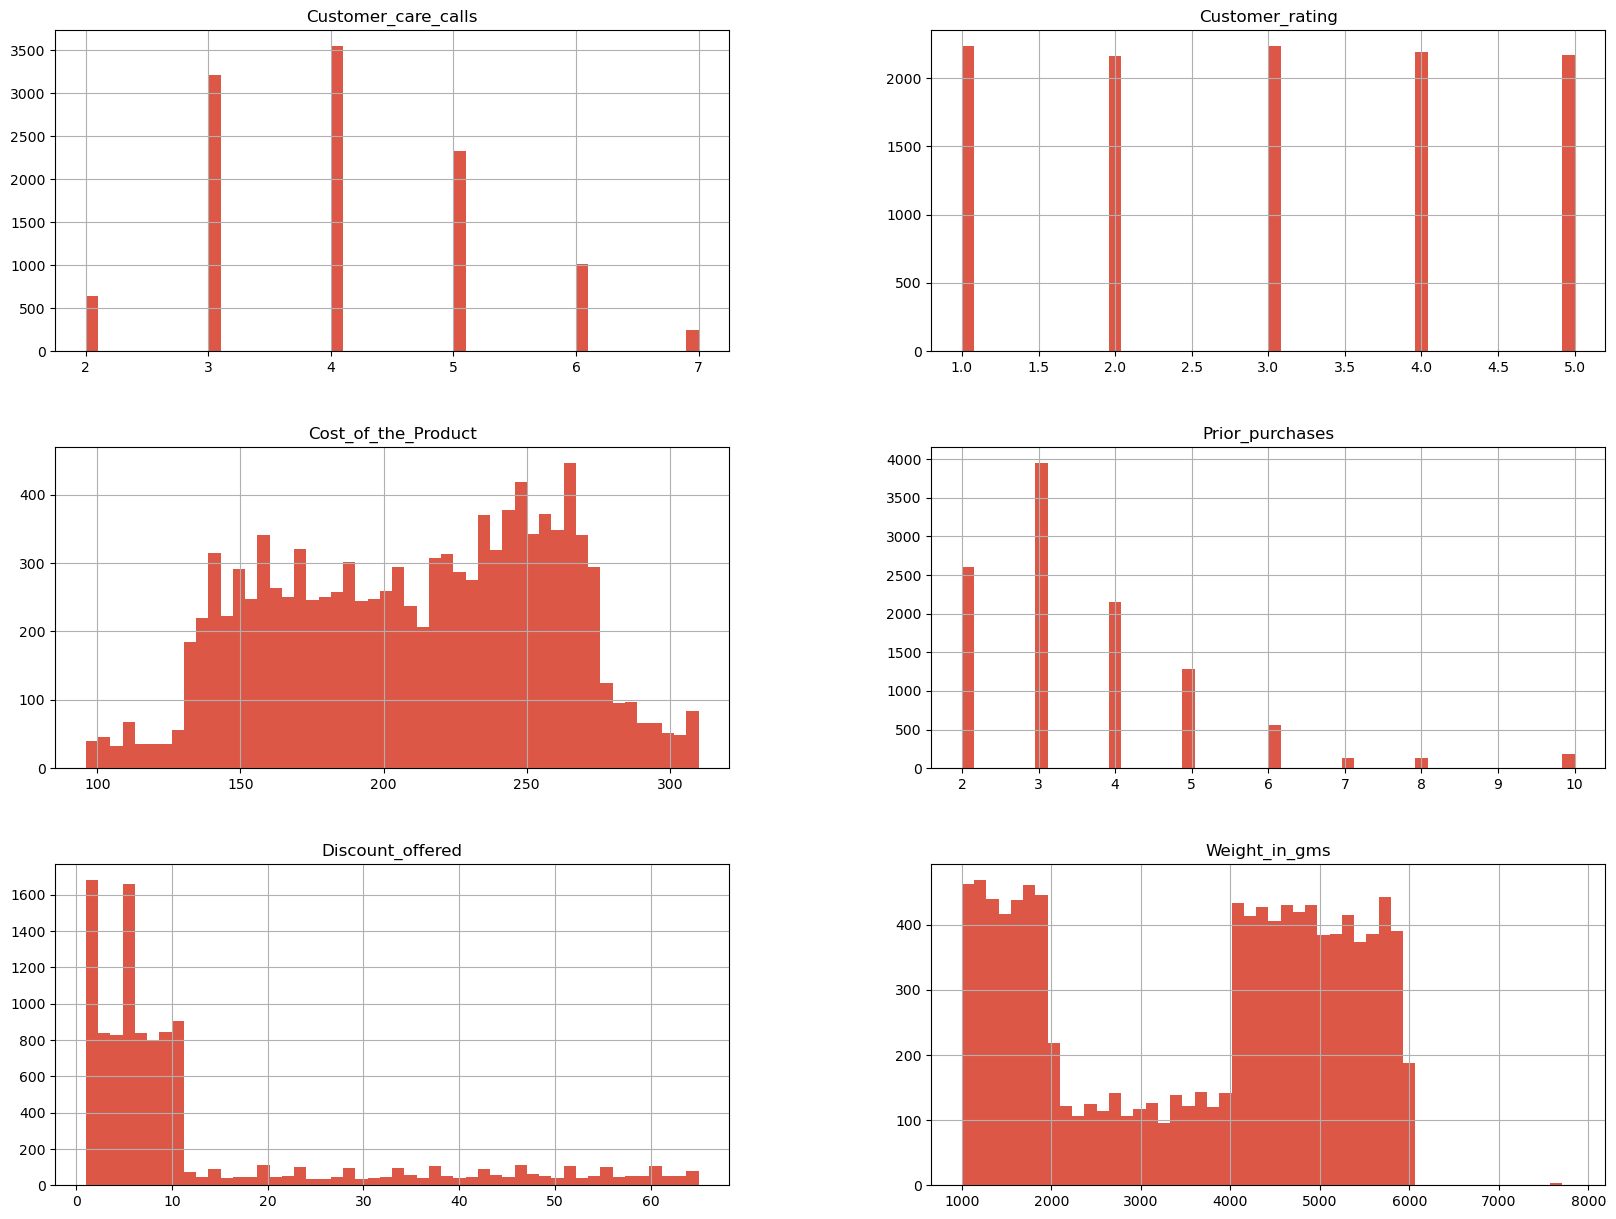

In [127]:
# Plot a histogram for each numerical attribute
df_plot = df.drop(["ID", "Reached.on.Time_Y.N"], axis = 1)
df_plot.hist(figsize=(20,15), bins=50, color="#DD5746")
plt.show()

Insights:
All numerical values have a not normal distribution. The analysis of central measure will be using median. Except for rating will be using mean average. 


#### Warehouse Block

In [128]:
# Number of Products in each Warehouse Block
df["Warehouse_block"].value_counts().reset_index()

,Warehouse_block,count
0,E,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


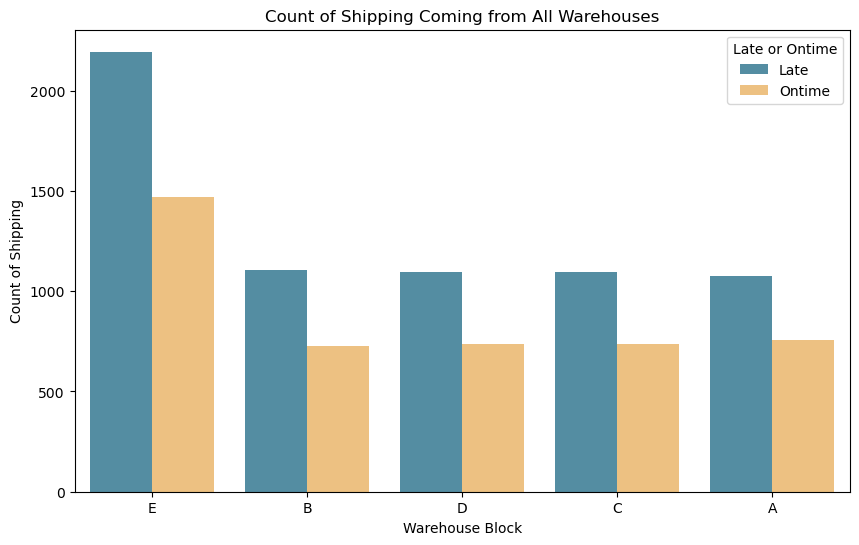

In [129]:
# Number of Products in each Warehouse Block and its arrival time
df_wh = df[["Warehouse_block", "Late_or_ontime"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_wh, x = "Warehouse_block", y = "count", hue="Late_or_ontime", palette=["#4793AF", "#FFC470"])
plt.title("Count of Shipping Coming from All Warehouses")
plt.xlabel("Warehouse Block")
plt.ylabel("Count of Shipping")
plt.legend(title="Late or Ontime")
plt.show()

In [130]:
df.groupby(["Warehouse_block"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Warehouse_block,Late_or_ontime,proportion
0,A,Late,0.586470
1,A,Ontime,0.413530
2,B,Late,0.602291
3,B,Ontime,0.397709
4,C,Late,0.596836
5,C,Ontime,0.403164
6,D,Late,0.597601
7,D,Ontime,0.402399
8,E,Late,0.598472
9,E,Ontime,0.401528


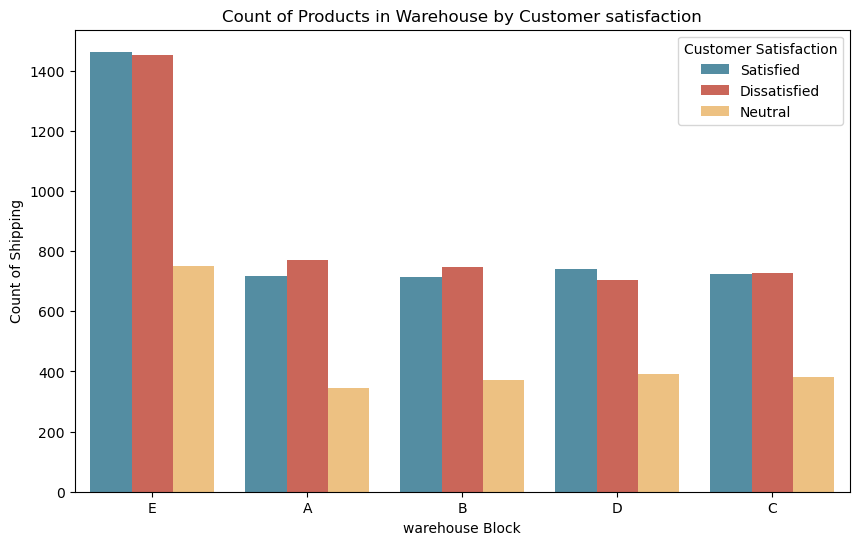

In [131]:
# Number of Products in each Shipping Method and customer satisfaction
df_wh = df[["Warehouse_block", "Customer_satisfaction"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_wh, x = "Warehouse_block", y = "count", hue="Customer_satisfaction", palette=["#4793AF", "#DD5746", "#FFC470"])
plt.title("Count of Products in Warehouse by Customer satisfaction")
plt.xlabel("warehouse Block")
plt.ylabel("Count of Shipping")
plt.legend(title="Customer Satisfaction")
plt.show()

In [132]:
df.groupby(['Warehouse_block', 'Product_importance']).size().reset_index(name='counts').sort_values(by=["Product_importance", "Warehouse_block"])

,Warehouse_block,Product_importance,counts
0,A,high,165
3,B,high,146
6,C,high,168
9,D,high,166
12,E,high,303
1,A,low,909
4,B,low,855
7,C,low,874
10,D,low,883
13,E,low,1776


In [133]:
df.groupby(["Warehouse_block"])[["Cost_of_the_Product", "Weight_in_gms"]].median().sort_values(by = "Cost_of_the_Product", ascending= False)

,Cost_of_the_Product,Weight_in_gms
Warehouse_block,,
B,219.0,4149.0
D,216.0,4134.5
C,214.0,4182.0
E,213.0,4153.5
A,212.0,4127.0


In [134]:
df.groupby(["Warehouse_block", "Weight_category"]).size().reset_index(name='count').sort_values(by=['Warehouse_block', 'count'], ascending=False)

,Warehouse_block,Weight_category,count
13,E,Light weight,1385
14,E,Medium weight,1297
12,E,Heavy weight,984
11,D,Medium weight,695
10,D,Light weight,681
9,D,Heavy weight,458
7,C,Light weight,692
8,C,Medium weight,669
6,C,Heavy weight,472
4,B,Light weight,688


Insights:

1. Warehouse E's Capacity and Product Importance: Warehouse E stores double the number of products compared to other warehouses and contains the highest proportion of high-importance products. This indicates that Warehouse E functions as a **superwarehouse**.

2. Delivery Delays Across Warehouses: Products from all five warehouses tend to arrive late more frequently than on time, suggesting potential **inefficiencies** and **ineffective** procedures in product handling both within the warehouses and during dispatch.

3. Customer Satisfaction Ratings: Warehouses E and D have the highest customer satisfaction ratings among all warehouses.

4. Consistency in Product Cost and Weight: The average cost and weight of products are closely distributed across all warehouses, indicating consistency in these parameters.

5. Warehouse A's Performance: Warehouse A has the **lowest rate** of late arrivals. Despite general issues with efficiency and effectiveness across all warehouses, Warehouse A demonstrates relatively better handling of product movements. This highlights the need to apply best practices from Warehouse A to improve operations in other warehouses.

6. Challenges in Warehouse B: Warehouse B experiences the highest late arrival rate at 60%. The majority of products stored in Warehouse B are lightweight and medium weight.

7. Customer Satisfaction Analysis: While customer satisfaction is generally higher than neutral, there is still a significant portion of dissatisfied customers. This dissatisfaction may came from delivery times or product quality issues.

Recommendations:
1. **Enhance Warehouse E's Efficiency**: Given Warehouse E's role as a superwarehouse, focus on optimizing its operations. Add more personnel to handle light and medium weight products and increase the availability of forklifts for managing heavy products.

2. **Improve Overall Shipping and Handling Procedures**: Since delivery delays are a common issue across all warehouses, a comprehensive review and enhancement of shipping and handling procedures are necessary. Implement better tracking systems, streamline logistics coordination, and enhance warehouse handling practices to reduce delays.

3. **Adopt Best Practices from Warehouse A**: Since Warehouse A has the lowest late arrival rate, analyze its practices and implement these best practices across other warehouses to improve overall efficiency and reduce late arrivals.

4. **Address Issues in Warehouse B**: Given Warehouse B's high late arrival rate, consider adding more personnel to improve product management and handling. This will help in reducing delays, especially for lightweight and medium weight products.

5. **Standardize Processes Across Warehouses**: The consistency in product cost and weight distribution suggests that standardizing shipping and handling processes across all warehouses can help streamline operations and reduce inefficiencies.

6. **Improve Customer Communication**: Enhance communication with customers regarding expected delivery times and any potential delays. Providing accurate and timely updates can improve customer satisfaction even in cases of unavoidable delays.

7. **Invest in Technology and Automation**: Implement advanced logistics technologies and automation in warehouses to improve efficiency, reduce handling times, and enhance accuracy in order fulfillment.|

#### Mode of Shipment

In [135]:
# Number of Products in each Warehouse Block
df["Mode_of_Shipment"].value_counts().reset_index()

,Mode_of_Shipment,count
0,Ship,7462
1,Flight,1777
2,Road,1760


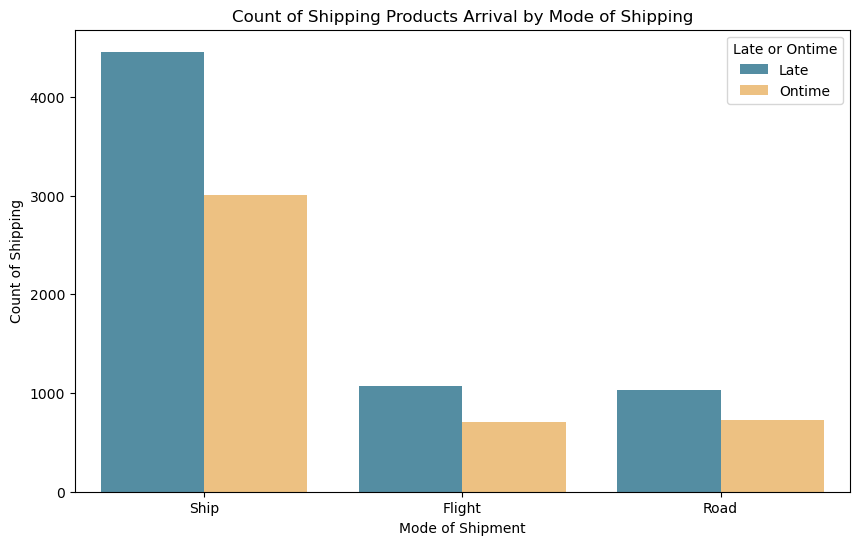

In [136]:
# Number of Products in each Shipping Method and its arrival time
df_sh = df[["Mode_of_Shipment", "Late_or_ontime"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_sh, x = "Mode_of_Shipment", y = "count", hue="Late_or_ontime", palette=["#4793AF", "#FFC470"])
plt.title("Count of Shipping Products Arrival by Mode of Shipping")
plt.xlabel("Mode of Shipment")
plt.ylabel("Count of Shipping")
plt.legend(title="Late or Ontime")
plt.show()

In [137]:
df.groupby(["Mode_of_Shipment"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Mode_of_Shipment,Late_or_ontime,proportion
0,Flight,Late,0.601576
1,Flight,Ontime,0.398424
2,Road,Late,0.588068
3,Road,Ontime,0.411932
4,Ship,Late,0.597561
5,Ship,Ontime,0.402439


In [138]:
df.groupby(['Mode_of_Shipment', 'Product_importance']).size().reset_index(name='counts').sort_values(by="counts", ascending=False)

,Mode_of_Shipment,Product_importance,counts
7,Ship,low,3602
8,Ship,medium,3233
4,Road,low,857
1,Flight,low,838
2,Flight,medium,776
5,Road,medium,745
6,Ship,high,627
0,Flight,high,163
3,Road,high,158


In [139]:
df.groupby(['Mode_of_Shipment', 'Weight_category']).size().reset_index(name='counts').sort_values(by="Weight_category", ascending=False)

,Mode_of_Shipment,Weight_category,counts
2,Flight,Medium weight,688
5,Road,Medium weight,627
8,Ship,Medium weight,2651
1,Flight,Light weight,660
4,Road,Light weight,668
7,Ship,Light weight,2816
0,Flight,Heavy weight,429
3,Road,Heavy weight,465
6,Ship,Heavy weight,1995


In [140]:
df.groupby(["Mode_of_Shipment"])[["Cost_of_the_Product", "Weight_in_gms"]].agg(["median"]).reset_index()

,Mode_of_Shipment,Cost_of_the_Product,Weight_in_gms
,,median,median
0,Flight,214.0,4152.0
1,Road,216.0,4194.5
2,Ship,214.0,4141.5


In [141]:
df.groupby(["Mode_of_Shipment"])[["Weight_in_gms"]].agg(["median"]).reset_index()

,Mode_of_Shipment,Weight_in_gms
,,median
0,Flight,4152.0
1,Road,4194.5
2,Ship,4141.5


In [142]:
df.groupby(["Mode_of_Shipment"])[["Customer_satisfaction"]].value_counts().reset_index()

,Mode_of_Shipment,Customer_satisfaction,count
0,Flight,Dissatisfied,731
1,Flight,Satisfied,716
2,Flight,Neutral,330
3,Road,Satisfied,709
4,Road,Dissatisfied,708
5,Road,Neutral,343
6,Ship,Dissatisfied,2961
7,Ship,Satisfied,2935
8,Ship,Neutral,1566


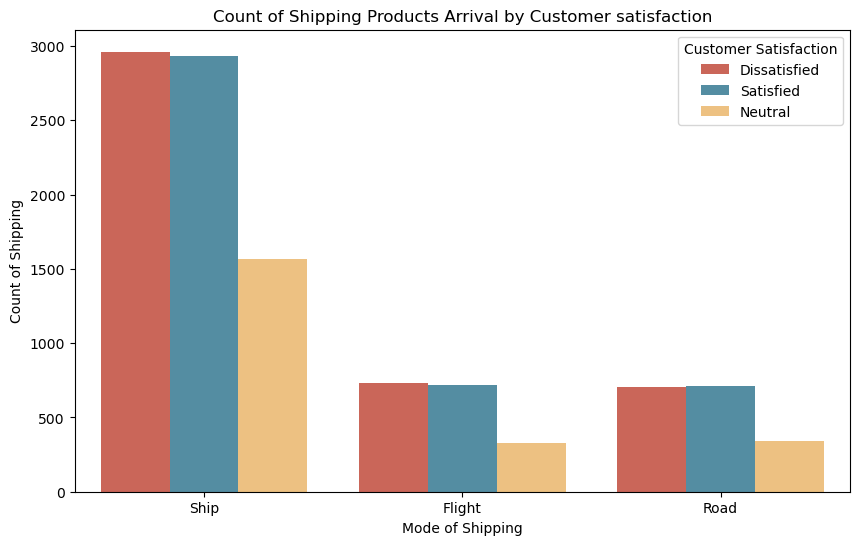

In [143]:
# Number of Products in each Shipping Method and customer satisfaction
df_sc = df[["Mode_of_Shipment", "Customer_satisfaction"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_sc, x = "Mode_of_Shipment", y = "count", hue="Customer_satisfaction", palette=["#DD5746", "#4793AF", "#FFC470"])
plt.title("Count of Shipping Products Arrival by Customer satisfaction")
plt.xlabel("Mode of Shipping")
plt.ylabel("Count of Shipping")
plt.legend(title="Customer Satisfaction")
plt.show()

Insights:
1. Dominance of Ocean Freight: **Ocean freight** is the most frequently used mode of shipping, followed by flights and road haul. Since ocean freight generally takes the **longest time to deliver**, it could be a significant factor contributing to the late arrival of products.

2. Consistent Late Arrivals: Products shipped via all modes—ocean freight, flight, and road haul—arrive late more often than on time. This indicates a widespread **issue with shipping efficiency**.

3. High Importance Products and Ocean Freight: High-importance products predominantly use ocean freight for shipment. Given the longer transit times associated with ocean freight, this might be adversely affecting their timely arrival.

4. Uniformity in Product Cost and Weight: The average cost and weight of products are closely distributed across all modes of shipment, indicating no significant disparity in these parameters.

5. Customer Satisfaction Distribution: Satisfaction and dissatisfaction ratings are closely distributed across different modes of shipment, with a noticeable number of neutral ratings. This distribution could be influenced by delivery times or the quality of the products.

Recommendations:
1. **Evaluate and Optimize Ocean Freight**: Given the extensive use of ocean freight and its impact on delivery times, it's crucial to evaluate and optimize this shipping mode. Consider negotiating with shipping partners for faster transit times or more efficient routes.

2. **Improve Overall Shipping Efficiency**: Since late arrivals are consistent across all shipping modes, a comprehensive review of the shipping processes is necessary. Implementing better tracking systems, improving logistics coordination, and enhancing warehouse handling procedures can help mitigate delays.

3. **Alternative Shipping Methods for High-Importance Products**: To ensure timely delivery, consider using faster shipping methods, such as air freight, for high-importance products. This may increase costs but will improve customer satisfaction and reduce the risk of late arrivals.

4. **Investigate Customer Satisfaction Factors**: Conduct a detailed analysis to understand the specific reasons behind the distribution of satisfaction, dissatisfaction, and neutral ratings. Focus on areas such as delivery times and product quality to identify and address key issues.

5. **Enhance Communication with Customers**: Improve communication with customers regarding expected delivery times and any potential delays. Providing accurate and timely updates can enhance customer satisfaction even if there are delays.

7. **Invest in Technology and Automation**: Implementing advanced logistics technologies and automation in warehouses can improve efficiency and reduce handling times, contributing to more timely deliveries.

### Looking Into the Product


In [144]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Late_or_ontime,Customer_satisfaction,Customer_segmentation,Weight_category
0,1,D,Flight,4,2,177,3,low,Female,44,1233,1,Late,Dissatisfied,Occasional,Light weight
1,2,E,Flight,4,5,216,2,low,Male,59,3088,1,Late,Satisfied,Occasional,Medium weight
2,3,A,Flight,2,2,183,4,low,Male,48,3374,1,Late,Dissatisfied,Regular,Medium weight
3,4,B,Flight,3,3,176,4,medium,Male,10,1177,1,Late,Neutral,Regular,Light weight
4,5,C,Flight,2,2,184,3,medium,Female,46,2484,1,Late,Dissatisfied,Occasional,Light weight


In [145]:
df["Product_importance"].value_counts().reset_index()

,Product_importance,count
0,low,5297
1,medium,4754
2,high,948


In [146]:
df.groupby(["Product_importance"])[["Cost_of_the_Product"]].agg(["median"]).reset_index()

,Product_importance,Cost_of_the_Product
,,median
0,high,205.5
1,low,218.0
2,medium,213.0


In [147]:
df.groupby(["Warehouse_block"])[["Cost_of_the_Product", "Weight_in_gms"]].median().sort_values(by = "Cost_of_the_Product", ascending= False)

,Cost_of_the_Product,Weight_in_gms
Warehouse_block,,
B,219.0,4149.0
D,216.0,4134.5
C,214.0,4182.0
E,213.0,4153.5
A,212.0,4127.0


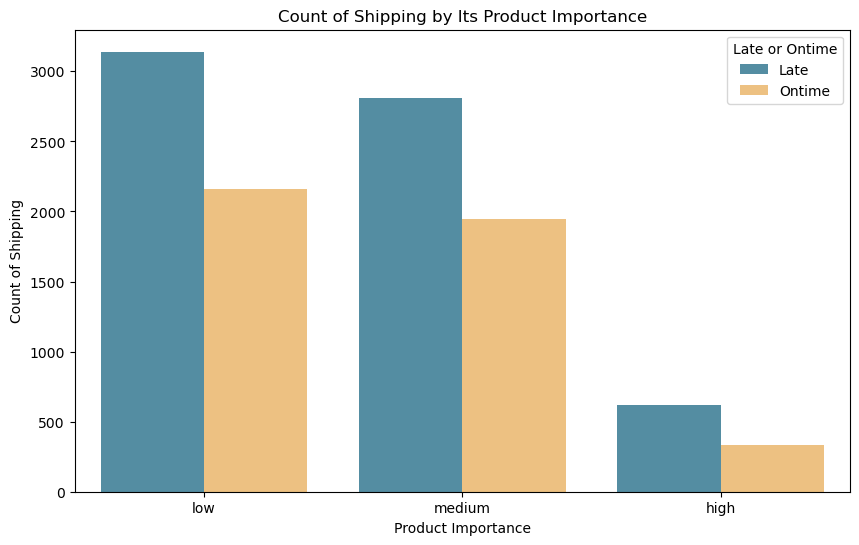

In [148]:
# Checking product late arrival based on its priority
pi_count = df[["Product_importance", "Late_or_ontime"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = pi_count, x = "Product_importance", y = "count", hue = "Late_or_ontime", palette=["#4793AF", "#FFC470"])
plt.title("Count of Shipping by Its Product Importance")
plt.xlabel("Product Importance")
plt.ylabel("Count of Shipping")
plt.legend(title="Late or Ontime")
plt.show()

In [149]:
df.groupby(["Product_importance"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Product_importance,Late_or_ontime,proportion
0,high,Late,0.649789
1,high,Ontime,0.350211
2,low,Late,0.592788
3,low,Ontime,0.407212
4,medium,Late,0.590450
5,medium,Ontime,0.409550


In [150]:
df.groupby(["Product_importance"])["Customer_rating"].mean().reset_index()

,Product_importance,Customer_rating
0,high,2.993671
1,low,2.983576
2,medium,2.997686


c:\Users\gembo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

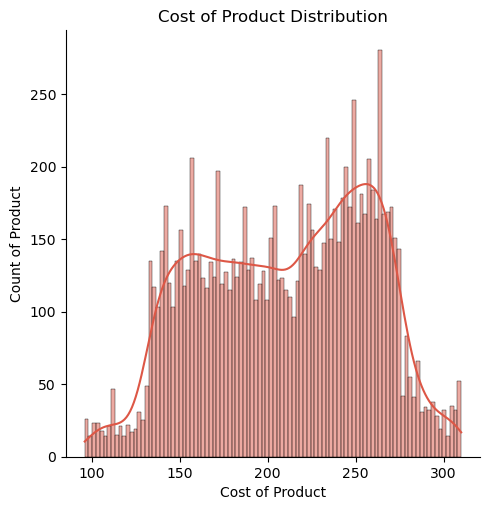

In [151]:
plt.figure(figsize=(10,7))
sns.displot(df["Cost_of_the_Product"], bins = 100, kde=True, color="#DD5746")
plt.title("Cost of Product Distribution")
plt.xlabel("Cost of Product")
plt.ylabel("Count of Product")
plt.show()

In [152]:
df.groupby(["Product_importance"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Product_importance,Customer_satisfaction,proportion
0,high,Dissatisfied,0.406118
1,high,Satisfied,0.399789
2,high,Neutral,0.194093
3,low,Dissatisfied,0.402492
4,low,Satisfied,0.398527
5,low,Neutral,0.198981
6,medium,Dissatisfied,0.396088
7,medium,Satisfied,0.393353
8,medium,Neutral,0.210560


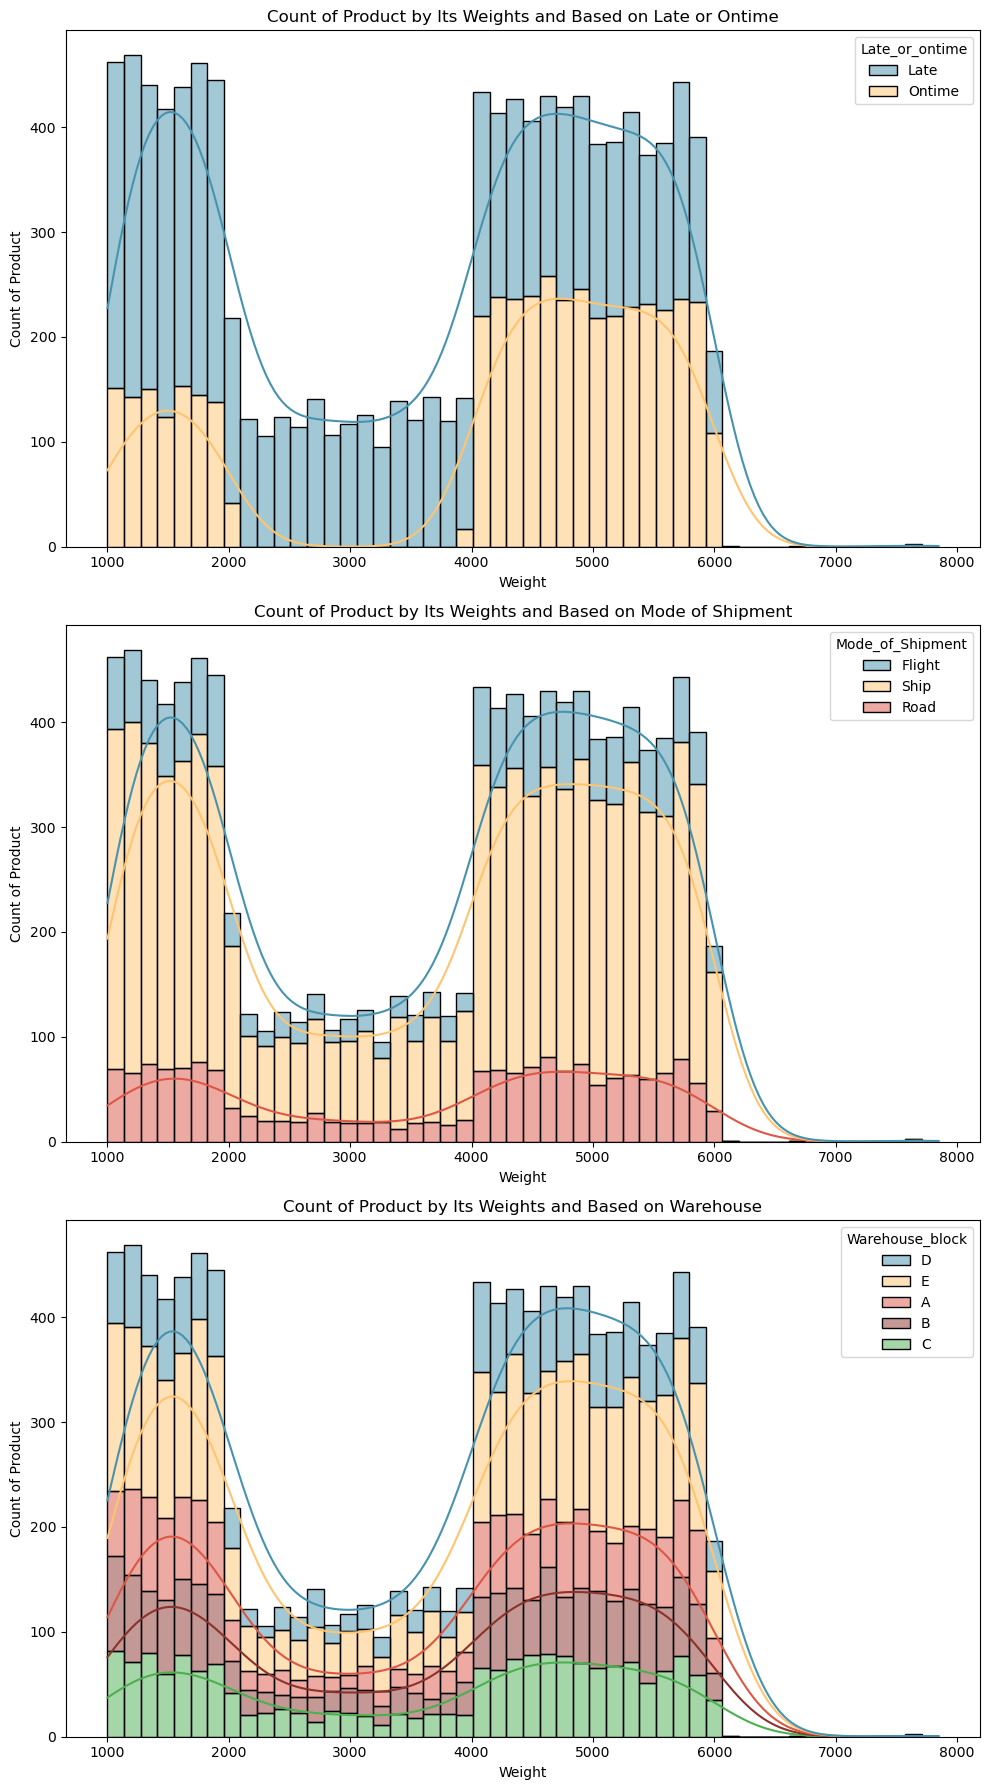

In [153]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.histplot(data=df, x="Weight_in_gms", bins=50, kde=True, hue="Late_or_ontime", multiple="stack", palette=["#4793AF", "#FFC470"], ax=axes[0])
axes[0].set_title("Count of Product by Its Weights and Based on Late or Ontime")
axes[0].set_xlabel("Weight")
axes[0].set_ylabel("Count of Product")

sns.histplot(data=df, x="Weight_in_gms", bins=50, kde=True, hue="Mode_of_Shipment", multiple="stack", palette=["#4793AF", "#FFC470", "#DD5746"], ax=axes[1])
axes[1].set_title("Count of Product by Its Weights and Based on Mode of Shipment")
axes[1].set_xlabel("Weight")
axes[1].set_ylabel("Count of Product")
sns.histplot(data=df, x="Weight_in_gms", bins=50, kde=True, hue="Warehouse_block", multiple="stack", palette=["#4793AF", "#FFC470", "#DD5746", "#8B322C", "#4CAF50"], ax=axes[2])
axes[2].set_title("Count of Product by Its Weights and Based on Warehouse")
axes[2].set_xlabel("Weight")
axes[2].set_ylabel("Count of Product")

plt.tight_layout()
plt.show()

Insights:
1. Product Importance Distribution: The majority of products sold are of low and medium importance.

2. Cost and Importance Correlation: Surprisingly, high-importance products have the lowest median cost among all product categories.

3. Late Arrival of High-Importance Products: High-importance products have a higher proportion of late arrivals compared to on-time deliveries, more so than products of other importance levels.

4. Cost Sensitivity of High-Importance Products: The lower median cost of high-importance products may indicate insensitivity to cost, potentially **aiming for higher profit margins** on these products.

5. Warehouse A's Product Cost Advantage: Warehouse A has the lowest median cost for its products, suggesting that products from Warehouse A could have higher profit margins compared to those from other warehouses.

6. Customer Satisfaction Distribution: Customer satisfaction is fairly evenly distributed across product importance categories, with more customers reporting satisfaction or dissatisfaction than neutrality. This may be due to late deliveries.

7. Late Arrival of Lightweight and Medium-Weight Products: Products weighing between 1000 to 4000 grams (light and medium weight) have a higher late arrival rate than heavier products.

Recommendations:
1. **Focus on High-Importance Product Logistics**: Given the higher late arrival rate of high-importance products, prioritize improving the logistics and handling processes for these products. Consider expedited shipping options or dedicated handling teams to ensure timely delivery.

2. **Optimize Cost and Pricing Strategies**: Re-evaluate the pricing strategy for high-importance products. Despite their lower median cost, ensure that the pricing reflects their importance and potential for higher margins without compromising on quality and delivery efficiency.

3. **Leverage Warehouse A's Cost Efficiency**: Analyze the practices at Warehouse A that result in the lowest median product costs and implement these practices across other warehouses to improve overall profit margins.

4. **Enhance Customer Communication and Support**: Improve communication with customers about delivery times and delays. Provide regular updates and offer compensation or discounts for late deliveries to maintain customer satisfaction.

5. **Address Delivery Delays for Lightweight and Medium-Weight Products**: Add more personnel dedicated to handling lightweight and medium-weight products in each warehouse. Ensure effective procedures are in place for loading these products into transport modes efficiently.

6. **Implement Standardized Procedures Across Warehouses**: Standardize effective practices across all warehouses to ensure consistency in product handling, cost management, and delivery efficiency.

7. **Invest in Technology and Automation**: Invest in advanced logistics technology and automation to streamline warehouse operations, improve handling accuracy, and reduce delivery times.

### Looking Into Customer

In [154]:
# Looking into customer gender proportion
gender_counts = df["Gender"].value_counts().reset_index()
gender_counts

,Gender,count
0,Female,5545
1,Male,5454


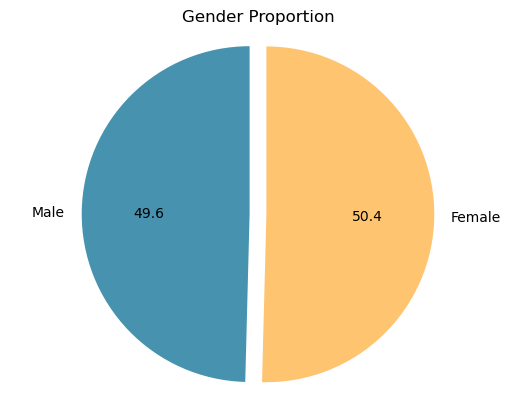

In [155]:
# styling
plt.pie(gender_counts["count"], 
        labels= gender_counts["Gender"],
        autopct="%.1f",
        colors=["#FFC470", "#4793AF"], 
        startangle=90, 
        counterclock=False,
        explode=[0.1, 0])
plt.title("Gender Proportion")
plt.axis("Equal")
plt.show()

In [156]:
df.groupby(["Gender"])[["Prior_purchases", "Discount_offered"]].agg(["median"]).reset_index()

,Gender,Prior_purchases,Discount_offered
,,median,median
0,Female,3.0,7.0
1,Male,3.0,7.0


In [157]:
df.groupby(["Product_importance"])[["Gender"]].value_counts().reset_index().sort_values(by="count", ascending=False)

,Product_importance,Gender,count
2,low,Female,2652
3,low,Male,2645
4,medium,Female,2423
5,medium,Male,2331
0,high,Male,478
1,high,Female,470


In [158]:
df.groupby(["Gender"])["Late_or_ontime"].value_counts().reset_index()

,Gender,Late_or_ontime,count
0,Female,Late,3296
1,Female,Ontime,2249
2,Male,Late,3267
3,Male,Ontime,2187


In [159]:
df.groupby(["Gender"])["Customer_satisfaction"].value_counts().reset_index().sort_values(by="count", ascending=False)

,Gender,Customer_satisfaction,count
0,Female,Dissatisfied,2211
1,Female,Satisfied,2191
3,Male,Dissatisfied,2189
4,Male,Satisfied,2169
2,Female,Neutral,1143
5,Male,Neutral,1096


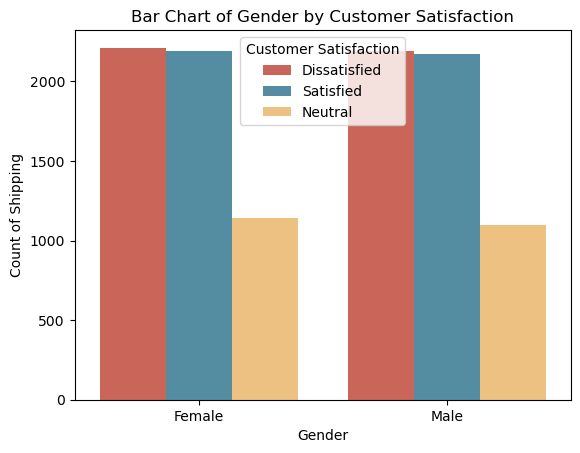

In [160]:
df_g = df.groupby(["Gender"])["Customer_satisfaction"].value_counts().reset_index()
sns.barplot(df_g, x = "Gender", y = "count", hue = "Customer_satisfaction",  palette=[ "#DD5746", "#4793AF", "#FFC470"])
plt.xlabel('Gender')
plt.ylabel('Count of Shipping')
plt.title('Bar Chart of Gender by Customer Satisfaction')
plt.legend(title='Customer Satisfaction')
plt.show()

In [161]:
df.groupby(["Customer_segmentation"])["Gender"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Gender,proportion
0,Loyal,Female,0.520362
1,Loyal,Male,0.479638
2,Occasional,Female,0.501068
3,Occasional,Male,0.498932
4,Regular,Female,0.507369
5,Regular,Male,0.492631


Insights:
1. The proportion of male and female customers is almost the same.
2. The average number of prior purchases is the same for both genders, approximately 3.5, and the discount offered is around 13.
3. There is no significant difference in the distribution of product importance between genders.
4. There is no significant difference in product arrival times by gender. Products arrive late more often than on time for both genders.
5. Customer satisfaction rates are similar for both genders, with neutral ratings being the least common.

Recommendations:
1. **Maintain Gender Neutral Marketing**: Since the customer base is evenly split between males and females, ensure that marketing strategies and promotions are gender-neutral to appeal equally to both groups.

2. **Analyze Discounts and Purchases**: Given the similar average prior purchases and discount offered across genders, evaluate the effectiveness of the current discount strategies. Ensure that the discounts provided are achieving the desired customer retention and purchase frequency.

3. **Focus on Product Importance Communication**: Since the distribution of product importance does not significantly differ between genders, focus on communicating the value and importance of products equally to all customers.

#### Purchasing Behavior

In [162]:
df.groupby(["Customer_segmentation"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Late_or_ontime,proportion
0,Loyal,Late,0.626697
1,Loyal,Ontime,0.373303
2,Occasional,Late,0.634574
3,Occasional,Ontime,0.365426
4,Regular,Late,0.531351
5,Regular,Ontime,0.468649


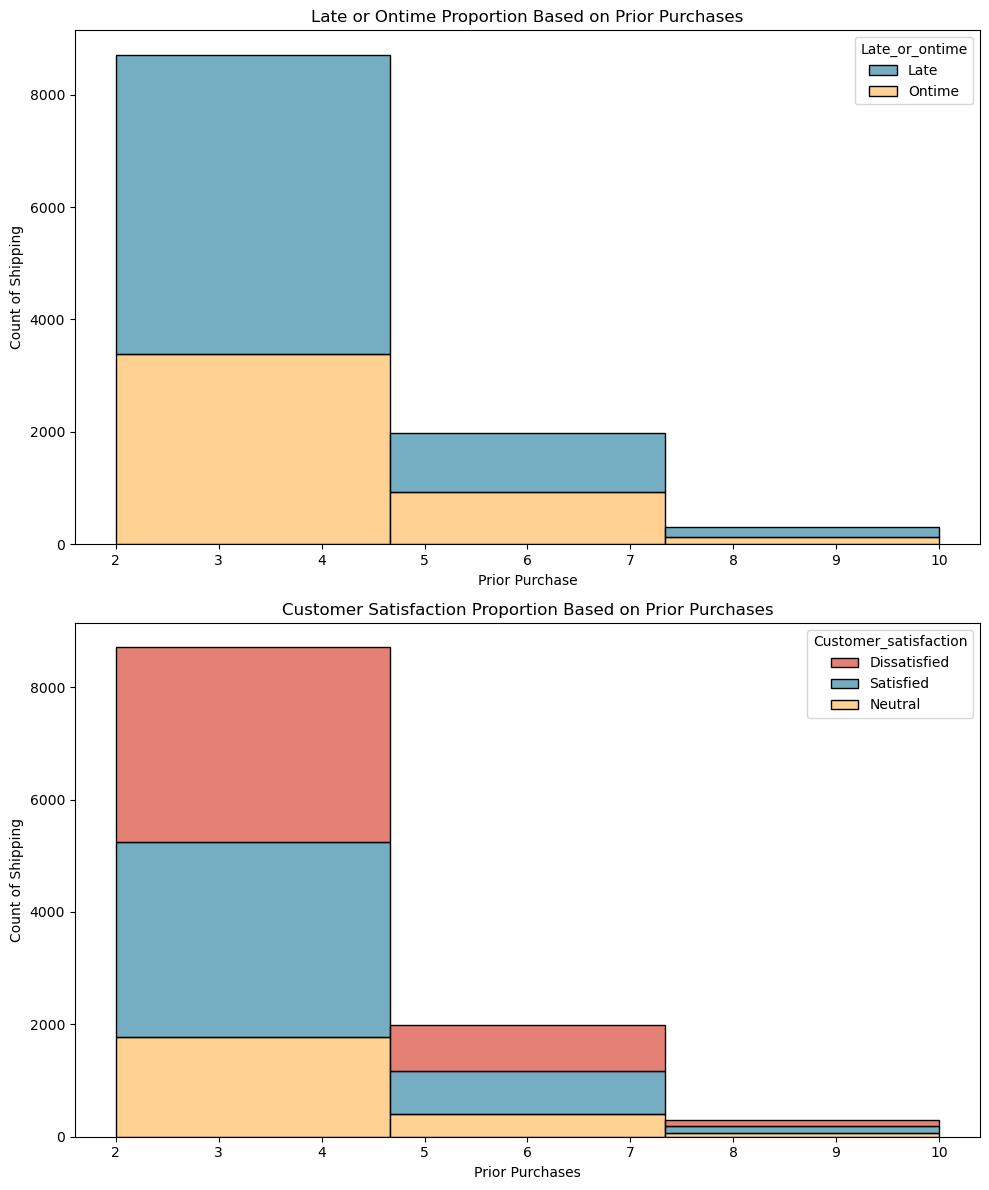

In [163]:

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.histplot(data=df, x="Prior_purchases", bins=3, hue="Late_or_ontime", multiple="stack", palette=["#4793AF", "#FFC470"], ax=axes[0])
axes[0].set_title("Late or Ontime Proportion Based on Prior Purchases")
axes[0].set_xlabel("Prior Purchase")
axes[0].set_ylabel("Count of Shipping")

sns.histplot(data=df, x="Prior_purchases", bins=3, hue="Customer_satisfaction", multiple="stack", palette=["#DD5746", "#4793AF", "#FFC470"], ax=axes[1])
axes[1].set_title("Customer Satisfaction Proportion Based on Prior Purchases")
axes[1].set_xlabel("Prior Purchases")
axes[1].set_ylabel("Count of Shipping")

plt.tight_layout()
plt.show()

In [164]:
df.groupby(["Customer_segmentation"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Customer_satisfaction,proportion
0,Loyal,Satisfied,0.416290
1,Loyal,Dissatisfied,0.380090
2,Loyal,Neutral,0.203620
3,Occasional,Dissatisfied,0.403418
4,Occasional,Satisfied,0.394110
5,Occasional,Neutral,0.202472
6,Regular,Satisfied,0.397952
7,Regular,Dissatisfied,0.396702
8,Regular,Neutral,0.205346


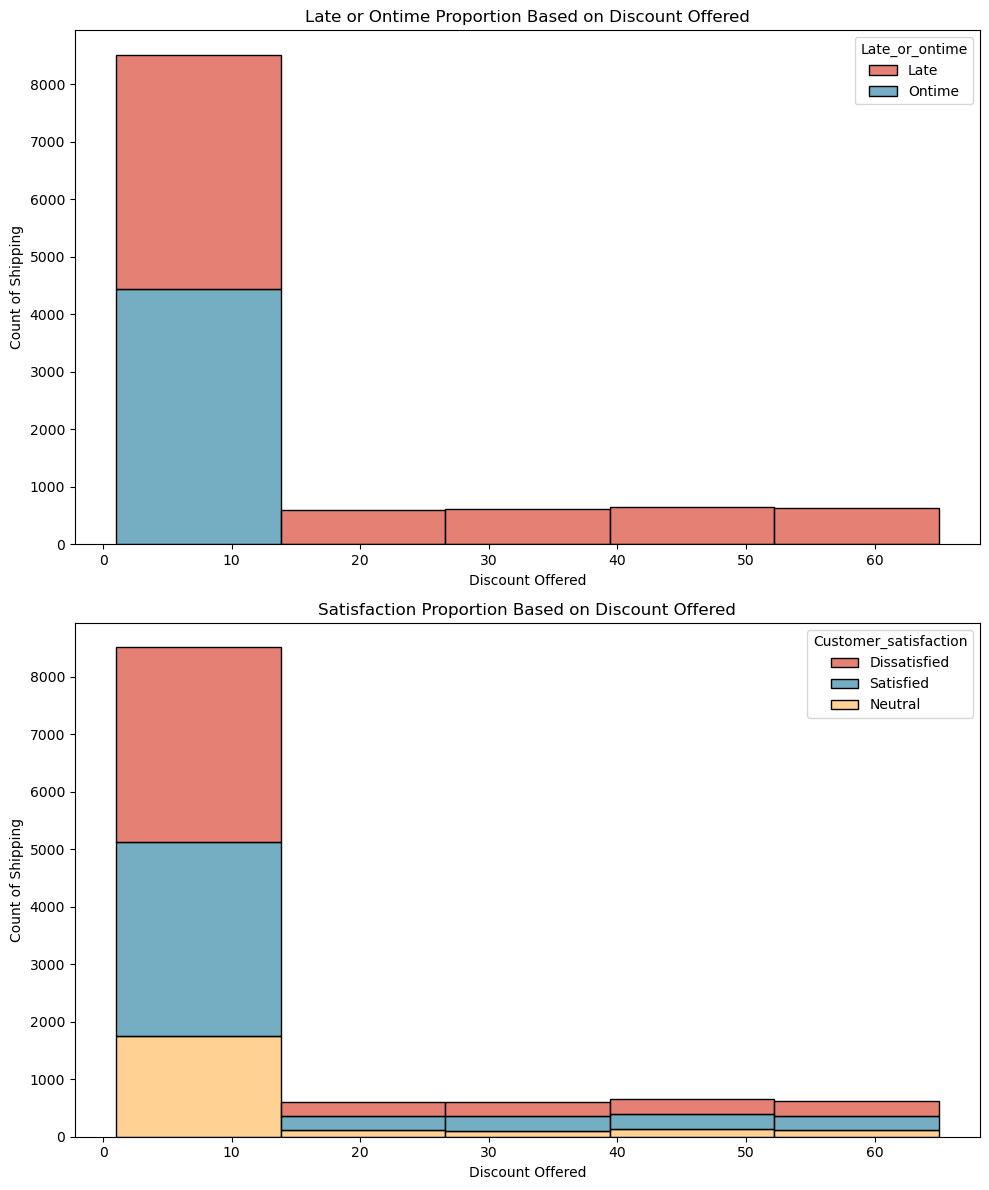

In [165]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.histplot(data=df, x="Discount_offered", bins=5, hue="Late_or_ontime", multiple="stack", palette=["#DD5746", "#4793AF"], ax=axes[0])
axes[0].set_title("Late or Ontime Proportion Based on Discount Offered")
axes[0].set_xlabel("Discount Offered")
axes[0].set_ylabel("Count of Shipping")

sns.histplot(data=df, x="Discount_offered", bins=5, hue="Customer_satisfaction", multiple="stack", palette=["#DD5746", "#4793AF", "#FFC470"], ax=axes[1])
axes[1].set_title("Satisfaction Proportion Based on Discount Offered")
axes[1].set_xlabel("Discount Offered")
axes[1].set_ylabel("Count of Shipping")

plt.tight_layout()
plt.show()

In [166]:
df_proportions = df.groupby("Customer_satisfaction")["Discount_offered"].value_counts(normalize=True).reset_index(name="proportion")
df_proportions.sort_values(by="Discount_offered", ascending=False).reset_index(drop=True)

,Customer_satisfaction,Discount_offered,proportion
0,Satisfied,65,0.002982
1,Neutral,65,0.003573
2,Dissatisfied,65,0.003409
3,Neutral,64,0.002680
4,Dissatisfied,64,0.005455
...,...,...,...
190,Satisfied,2,0.081193
191,Dissatisfied,2,0.073636
192,Satisfied,1,0.074312
193,Dissatisfied,1,0.075000


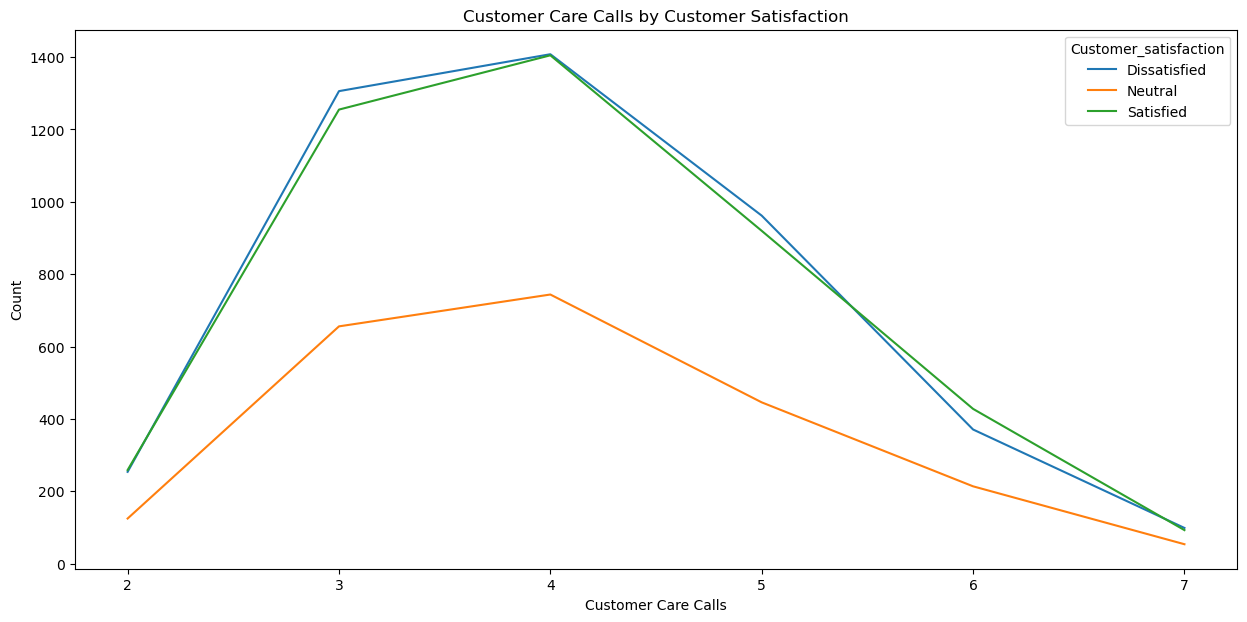

In [167]:

plt.figure(figsize=(15,7))
df_cc = df.groupby(["Customer_satisfaction", "Customer_care_calls"]).size().reset_index(name='count')
sns.lineplot(data=df_cc, x="Customer_care_calls", y="count", hue="Customer_satisfaction")

plt.title("Customer Care Calls by Customer Satisfaction")
plt.xlabel("Customer Care Calls")
plt.ylabel("Count")
plt.show()

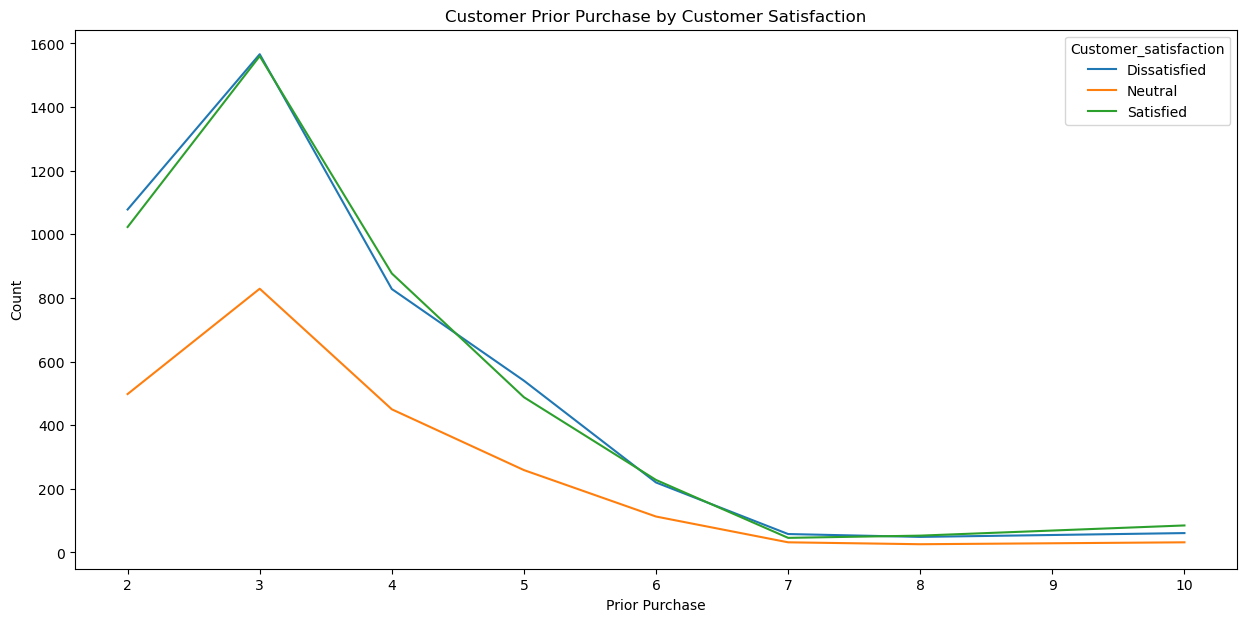

In [168]:
plt.figure(figsize=(15,7))
df_pp = df.groupby(["Customer_satisfaction", "Prior_purchases"]).size().reset_index(name='count')
sns.lineplot(data=df_pp, x="Prior_purchases", y="count", hue="Customer_satisfaction")

plt.title("Customer Prior Purchase by Customer Satisfaction")
plt.xlabel("Prior Purchase")
plt.ylabel("Count")
plt.show()

Insights:
1. **Regular customers** receive the best on-time delivery rate at 46%.
2. **Loyal customers** have the highest satisfaction rate, with 41% of them being satisfied.
3. Discounts exceeding 15% are associated with late deliveries, which leads to a high dissatisfaction rate. This could be due to a special event where NanoTech give a huge discount and have an overload transaction amount hence the late delivery. This could indicate that the customer like the discount event and NanoTech products.
4. Satisfaction rates are close to dissatisfaction rates. Despite many late deliveries, the high satisfaction rate may be attributed to the NanoTech products.
5. There is no significant difference between Customer Care Calls and Prior Purchase towards Customer Satisfaction.

Recommendations:

1. **Focus on Regular Customers**: Since regular customers have the highest on-time delivery rate, analyze the practices and processes that contribute to this success and implement them across all customer segments to improve overall delivery performance.

2. **Enhance Loyalty Programs**: Given that loyal customers have the highest satisfaction rate, continue to strengthen loyalty programs. Offer exclusive benefits and personalized experiences to retain these valuable customers.

3. **Improve Logistics for High Discounts**: Discounts over 15% are linked to late deliveries and high dissatisfaction rates. Address the logistical challenges during special events.

4. **Maintain Product Quality**: Despite late deliveries, the quality of the products appears to maintain high satisfaction levels. Continue to prioritize and possibly enhance product quality to sustain and improve customer satisfaction.

5. **Balance Satisfaction and Dissatisfaction Rates**: With satisfaction rates close to dissatisfaction rates, focus on reducing late deliveries and improving other aspects of the customer experience, such as communication and post-purchase support, to shift neutral and dissatisfied customers towards satisfaction.

6. **Customer Feedback Analysis**: Collect and analyze feedback specifically related to discounts and delivery times to identify specific issues and opportunities for improvement. Tailor strategies based on this feedback to enhance the overall customer experience.

### Looking into customer rating and satisfaction

In [169]:
df["Customer_satisfaction"].value_counts().reset_index()

,Customer_satisfaction,count
0,Dissatisfied,4400
1,Satisfied,4360
2,Neutral,2239


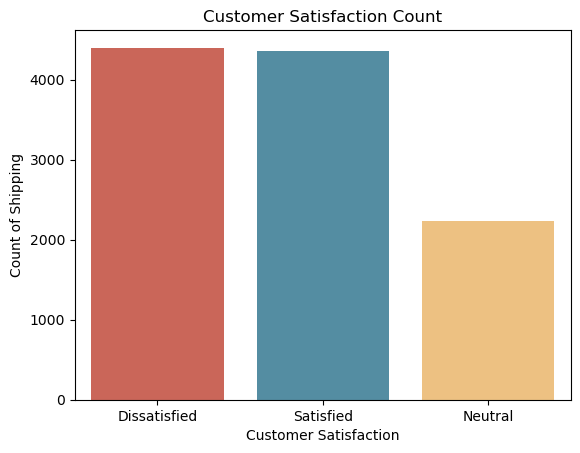

In [170]:
df_cf = df["Customer_satisfaction"].value_counts().reset_index()
sns.barplot(data=df_cf, x="Customer_satisfaction", y="count", palette=["#DD5746", "#4793AF", "#FFC470"])
plt.title("Customer Satisfaction Count")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Count of Shipping")
plt.show()

In [171]:
df.groupby(["Late_or_ontime"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Late_or_ontime,Customer_satisfaction,proportion
0,Late,Satisfied,0.399208
1,Late,Dissatisfied,0.394027
2,Late,Neutral,0.206765
3,Ontime,Dissatisfied,0.408927
4,Ontime,Satisfied,0.392245
5,Ontime,Neutral,0.198828


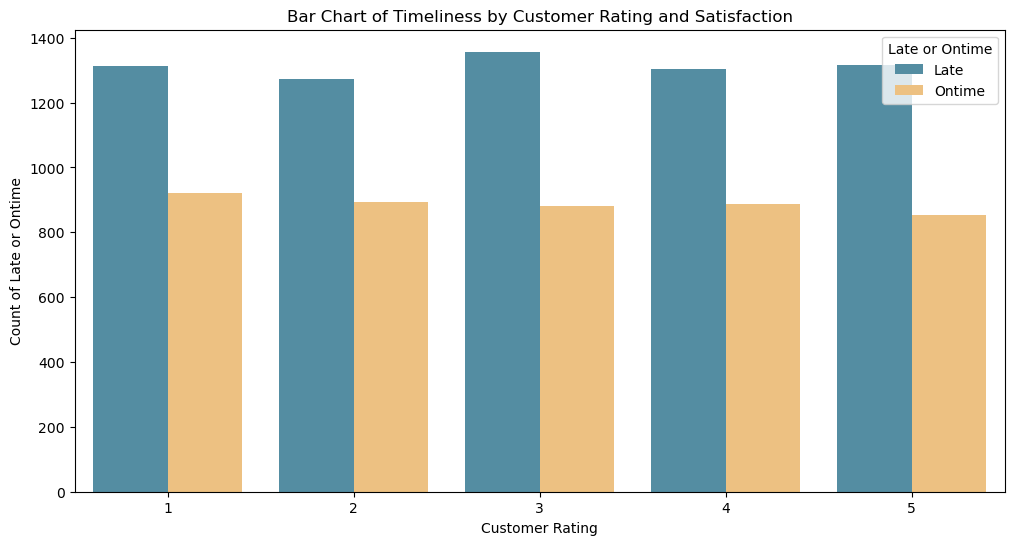

In [172]:
grouped_counts = df.groupby(['Customer_rating', 'Customer_satisfaction', 'Late_or_ontime']).size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_counts, x='Customer_rating', y='count', hue='Late_or_ontime',  palette=["#4793AF", "#FFC470"])
plt.xlabel('Customer Rating')
plt.ylabel('Count of Late or Ontime')
plt.title('Bar Chart of Timeliness by Customer Rating and Satisfaction')
plt.legend(title='Late or Ontime')
plt.show()

In [173]:
df.groupby(["Warehouse_block"])["Customer_rating"].agg(mean_rating=("mean")).reset_index().sort_values(by="mean_rating", ascending=False)


,Warehouse_block,mean_rating
3,D,3.017993
4,E,2.996727
2,C,2.993999
1,B,2.980360
0,A,2.957447


In [174]:
df.groupby(["Mode_of_Shipment"])["Customer_rating"].agg(mean_rating=("mean")).reset_index().sort_values(by="mean_rating", ascending=False)

,Mode_of_Shipment,mean_rating
1,Road,2.995455
2,Ship,2.991289
0,Flight,2.982555


In [175]:
df.groupby(["Customer_segmentation"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Customer_satisfaction,proportion
0,Loyal,Satisfied,0.416290
1,Loyal,Dissatisfied,0.380090
2,Loyal,Neutral,0.203620
3,Occasional,Dissatisfied,0.403418
4,Occasional,Satisfied,0.394110
5,Occasional,Neutral,0.202472
6,Regular,Satisfied,0.397952
7,Regular,Dissatisfied,0.396702
8,Regular,Neutral,0.205346


In [176]:
df.groupby(["Product_importance"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Product_importance,Customer_satisfaction,proportion
0,high,Dissatisfied,0.406118
1,high,Satisfied,0.399789
2,high,Neutral,0.194093
3,low,Dissatisfied,0.402492
4,low,Satisfied,0.398527
5,low,Neutral,0.198981
6,medium,Dissatisfied,0.396088
7,medium,Satisfied,0.393353
8,medium,Neutral,0.210560


**Summary and Goals:**
Despite a higher occurance of late deliveries compared to on-time ones, customer satisfaction rates are evenly distributed between satisfied and dissatisfied, with neutral ratings being the lowest. This suggests could suggest that they are dissatisfied with the delivery times. But there is another factor that cause the high level of satisfied customer and for that more data and further analysis must be conduct. Therefore, the goals are as follows:

**1. Increase the on-time delivery rate by 10% within the next three months.**

**2. Increase the satisfied rating rate by 10% within the next three months.**

By focusing on these objectives, the aim is to imporve on-time delivery rate and enhance overall customer satisfaction.







## Importing Data
Importing data to csv to make a Tableau dashboard and story.

In [177]:
df.to_csv('online_retail_shipping.csv', index=False, sep=';', encoding='utf-8', header=True)